In [1]:
import os
import json

# Перейти на уровень выше из текущего рабочего каталога
os.chdir('..')

# Получение текущего рабочего каталога
current_directory = os.getcwd()
print(f"Текущий рабочий каталог: {current_directory}")

# Составление пути к каталогу
relative_path_parts = [
    'results2', 'linear_regression_loop'
]
relative_path = os.path.join(*relative_path_parts)

# Полный путь к каталогу
full_path = os.path.join(current_directory, relative_path)
print(f"Проверка каталога: {full_path}")

# Проверка существования каталога
if os.path.exists(full_path):
    summary_files = {}

    # Поиск всех файлов wandb-summary.json
    for root, dirs, files in os.walk(full_path):
        for file in files:
            if file == 'wandb-summary.json':
                # Название папки на два уровня выше
                grandparent_folder_name = os.path.basename(os.path.dirname(os.path.dirname(os.path.dirname(root))))
                file_path = os.path.join(root, file)

                with open(file_path, 'r', encoding='utf-8') as f:
                    summary_data = json.load(f)

                # Добавляем данные в словарь
                summary_files[grandparent_folder_name] = summary_data

    # Вывод содержимого словаря
    for folder, summary in summary_files.items():
        print(f"Папка: {folder}, wandb-summary.json: {summary}")

else:
    print(f"Каталог по пути {full_path} не найден.")

Текущий рабочий каталог: C:\Users\Alexandr\PycharmProjects\looped_transformer
Проверка каталога: C:\Users\Alexandr\PycharmProjects\looped_transformer\results2\linear_regression_loop
Папка: 0801183617-LR_loop_L1_ends{30}_T{15}-be7f, wandb-summary.json: {'overall_loss': 1.6352062225341797, 'loop_times': 30, 'grad_norm/layerwise': {'_read_in.weight': 1.3777822256088257, '_read_in.bias': 0.1949838250875473, '_backbone.transformer.wpe.weight': 0.2784847915172577, '_backbone.transformer.h.0.ln_1.weight': 0.10080426186323166, '_backbone.transformer.h.0.ln_1.bias': 0.07897669821977615, '_backbone.transformer.h.0.attn.c_attn.weight': 3.3864340782165527, '_backbone.transformer.h.0.attn.c_attn.bias': 0.16423872113227844, '_backbone.transformer.h.0.attn.c_proj.weight': 1.3778694868087769, '_backbone.transformer.h.0.attn.c_proj.bias': 0.15471597015857697, '_backbone.transformer.h.0.ln_2.weight': 0.07673302292823792, '_backbone.transformer.h.0.ln_2.bias': 0.057107530534267426, '_backbone.transformer

In [2]:
summary_files.keys()

dict_keys(['0801183617-LR_loop_L1_ends{30}_T{15}-be7f', '0801185946-LR_loop_L2_ends{30}_T{15}-af9c', '0801193901-LR_loop_L3_ends{30}_T{15}-7c1a', '0801213059-LR_loop_L1_ends{30}_T{15}_last_tokens{25}-8fcc', '0802182548-LR_loop_L1_ends{30}_T{15}_last_tokens{55}-1117', '0802185951-LR_loop_L1_ends{30}_T{15}_last_tokens{75}-e60d', '0802203711-LR_loop_L1_ends{30}_T{15}_lstm-ddf9', '0802205555-LR_loop_L2_ends{30}_T{15}_lstm-aed9', '0802214308-LR_loop_L3_ends{30}_T{15}_lstm-07b8'])

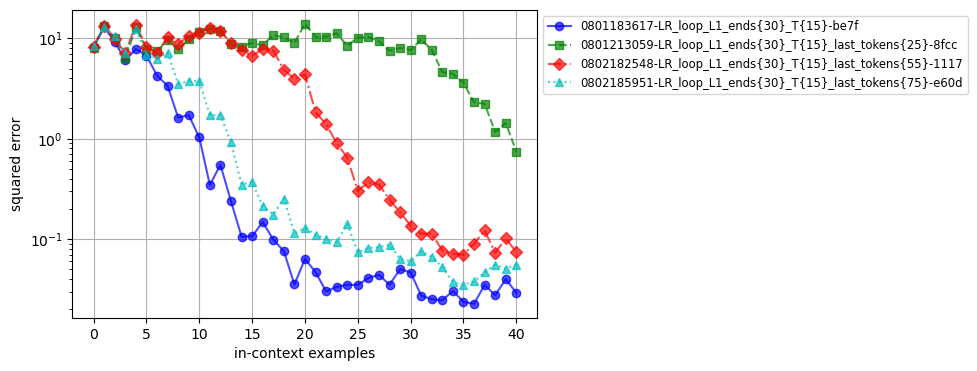

In [4]:
import matplotlib.pyplot as plt

# Создание одного графика для всех значений словаря
plt.figure(figsize=(6, 4))

# Определение стилей для различных моделей
styles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', '^', 'v']
colors = ['b', 'g', 'r', 'c', 'm']

# Проходим по всем элементам словаря и добавляем линии на график
i = 0
for key, value in summary_files.items():
    if "last_tokens" in key or "0801183617-LR_loop_L1_ends{30}_T{15}-be7f" in key:
        x = list(map(int, value['pointwise/loss'].keys()))  # Преобразование ключей в целые числа
        y = list(value['pointwise/loss'].values())

        # Использование различных стилей линий и маркеров для различия
        style = styles[i % len(styles)]
        marker = markers[i % len(markers)]
        color = colors[i % len(colors)]

        plt.plot(x, y, linestyle=style, marker=marker, color=color, alpha=0.7, label=key)

        i += 1

# Настройка графика
# plt.title("Diagrams for all models")
plt.xlabel("in-context examples")
plt.ylabel("squared error")
plt.legend()
plt.grid(True)

# Установка логарифмической шкалы для оси Y
plt.yscale('log')

# Настройка легенды
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')

# Сохранение графика
plt.savefig('charts/LR_loop_last_tokens.png', bbox_inches='tight')

# Показ графика
plt.show()

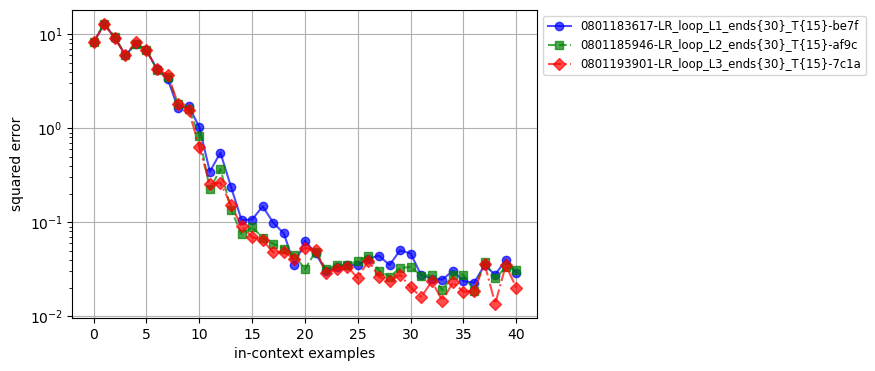

In [5]:
import matplotlib.pyplot as plt

# Создание одного графика для всех значений словаря
plt.figure(figsize=(6, 4))

# Определение стилей для различных моделей
styles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', '^', 'v']
colors = ['b', 'g', 'r', 'c', 'm']

# Проходим по всем элементам словаря и добавляем линии на график
i = 0
for key, value in summary_files.items():
    if "last_tokens" not in key and "lstm" not in key:
        x = list(map(int, value['pointwise/loss'].keys()))  # Преобразование ключей в целые числа
        y = list(value['pointwise/loss'].values())

        # Использование различных стилей линий и маркеров для различия
        style = styles[i % len(styles)]
        marker = markers[i % len(markers)]
        color = colors[i % len(colors)]

        plt.plot(x, y, linestyle=style, marker=marker, color=color, alpha=0.7, label=key)

        i += 1

# Настройка графика
# plt.title("Diagrams for all models")
plt.xlabel("in-context examples")
plt.ylabel("squared error")
plt.legend()
plt.grid(True)

# Установка логарифмической шкалы для оси Y
plt.yscale('log')

# Настройка легенды
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')

# Сохранение графика
plt.savefig('charts/LR_loop.png', bbox_inches='tight')

# Показ графика
plt.show()

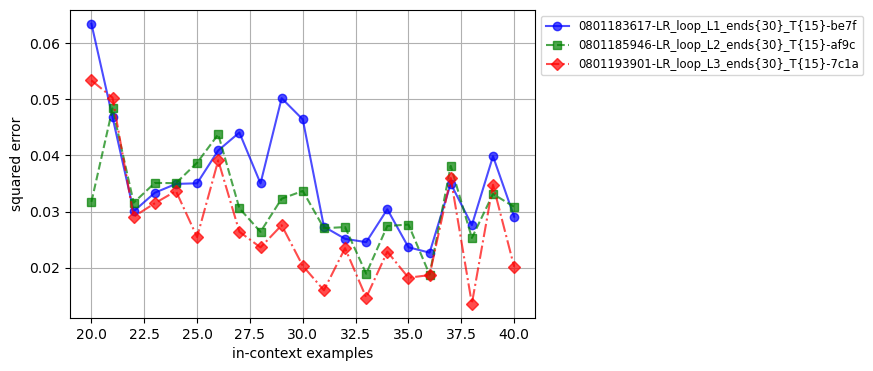

In [6]:
import matplotlib.pyplot as plt

# Создание одного графика для всех значений словаря
plt.figure(figsize=(6, 4))

# Определение стилей для различных моделей
styles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', '^', 'v']
colors = ['b', 'g', 'r', 'c', 'm']

# Проходим по всем элементам словаря и добавляем линии на график
i = 0
for key, value in summary_files.items():
    if "last_tokens" not in key and "lstm" not in key:
        x = list(map(int, value['pointwise/loss'].keys()))  # Преобразование ключей в целые числа
        y = list(value['pointwise/loss'].values())

        # Использование различных стилей линий и маркеров для различия
        style = styles[i % len(styles)]
        marker = markers[i % len(markers)]
        color = colors[i % len(colors)]

        plt.plot(x[20:], y[20:], linestyle=style, marker=marker, color=color, alpha=0.7, label=key)

        i += 1

# Настройка графика
# plt.title("Diagrams for all models")
plt.xlabel("in-context examples")
plt.ylabel("squared error")
plt.legend()
plt.grid(True)

# Установка логарифмической шкалы для оси Y
# plt.yscale('log')

# Настройка легенды
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')

# Сохранение графика
plt.savefig('charts/LR_loop_zoom.png', bbox_inches='tight')

# Показ графика
plt.show()

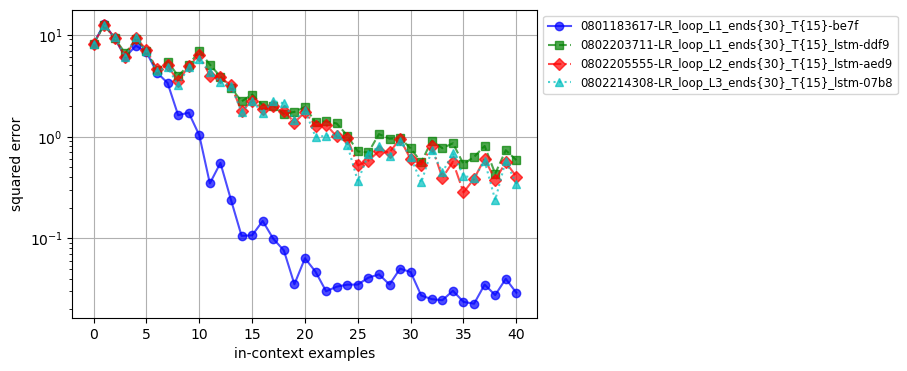

In [7]:
import matplotlib.pyplot as plt

# Создание одного графика для всех значений словаря
plt.figure(figsize=(6, 4))

# Определение стилей для различных моделей
styles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', '^', 'v']
colors = ['b', 'g', 'r', 'c', 'm']

# Проходим по всем элементам словаря и добавляем линии на график
i = 0
for key, value in summary_files.items():
    if "lstm" in key or "0801183617-LR_loop_L1_ends{30}_T{15}-be7f" in key:
        x = list(map(int, value['pointwise/loss'].keys()))  # Преобразование ключей в целые числа
        y = list(value['pointwise/loss'].values())

        # Использование различных стилей линий и маркеров для различия
        style = styles[i % len(styles)]
        marker = markers[i % len(markers)]
        color = colors[i % len(colors)]

        plt.plot(x, y, linestyle=style, marker=marker, color=color, alpha=0.7, label=key)

        i += 1

# Настройка графика
# plt.title("Diagrams for all models")
plt.xlabel("in-context examples")
plt.ylabel("squared error")
plt.legend()
plt.grid(True)

# Установка логарифмической шкалы для оси Y
plt.yscale('log')

# Настройка легенды
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')

# Сохранение графика
plt.savefig('charts/LR_loop_lstm.png', bbox_inches='tight')

# Показ графика
plt.show()

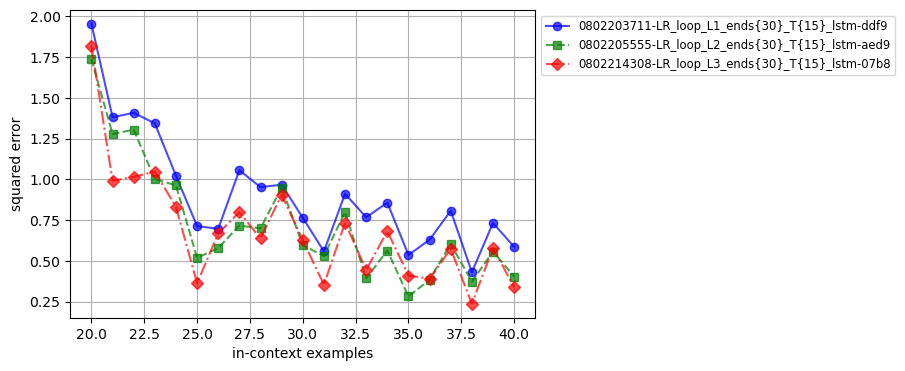

In [8]:
import matplotlib.pyplot as plt

# Создание одного графика для всех значений словаря
plt.figure(figsize=(6, 4))

# Определение стилей для различных моделей
styles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', '^', 'v']
colors = ['b', 'g', 'r', 'c', 'm']

# Проходим по всем элементам словаря и добавляем линии на график
i = 0
for key, value in summary_files.items():
    if "lstm" in key:
        x = list(map(int, value['pointwise/loss'].keys()))  # Преобразование ключей в целые числа
        y = list(value['pointwise/loss'].values())

        # Использование различных стилей линий и маркеров для различия
        style = styles[i % len(styles)]
        marker = markers[i % len(markers)]
        color = colors[i % len(colors)]

        plt.plot(x[20:], y[20:], linestyle=style, marker=marker, color=color, alpha=0.7, label=key)

        i += 1

# Настройка графика
# plt.title("Diagrams for all models")
plt.xlabel("in-context examples")
plt.ylabel("squared error")
plt.legend()
plt.grid(True)

# Установка логарифмической шкалы для оси Y
# plt.yscale('log')

# Настройка легенды
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')

# Сохранение графика
plt.savefig('charts/LR_loop_lstm_zoom.png', bbox_inches='tight')

# Показ графика
plt.show()